Notlar TechproEducation Data Science egitiminden alinmistir.

**Makine Ögrenmesi Sürecleri:** https://medium.com/academy-team/makine-%C3%B6%C4%9Frenmesi-s%C3%BCre%C3%A7leri-dokuz-ad%C4%B1mda-ba%C5%9Far%C4%B1ya-giden-yol-c34dab36dc26

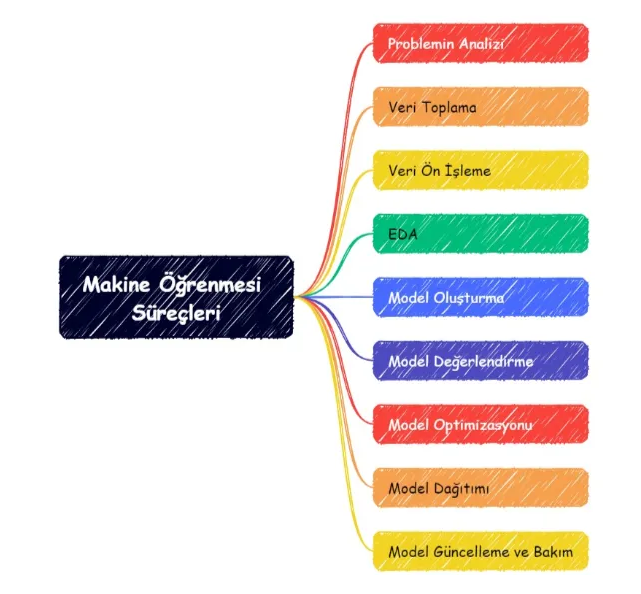

# About the Dataset

**RFMTC Bilesenleri**

1. **Recency (R) - Yakinlik  — "Recency (months)"**
    - Bir bagiscinin son bagisindan bu yana ne kadar süre gectigini temsil eder. Gelecekteki bagis olasiligi icin kritik bir öngörücüdür, daha yakin zamanda bagis yapanlarin tekrar bagis yapma olasiligi daha yüksektir.
  
2. **Frequency (F) - Siklik — "Frequency (times)"**
    - Bir bagiscinin ne siklikla kan bagisi yaptigini gösterir. Bagiscinin kan bagisina olan bagliligini gösterir, sik bagis yapanlar davranislarini sürdürme olasiligi daha yüksek olanlardir.
 
3. **Monetary (M) - Parasal Deger — "Monetary (c.c. blood)"**
    - Bagislanan kanin toplam hacmini yansitir. Bagiscinin baglanti düzeyi ve tekrar bagis yapma potansiyeli ile iliskilidir.

4. **Time (T) - Zaman — "Time (months)"**
    - Bu, bir bagiscinin ilk bagisindan bu yana ne kadar süre gectigini gösterir. Bu özellik, bagiscinin bagis yapma süresi boyunca ne kadar "sadik" oldugunu anlamak icin kullanılabilir.

5. **Churn (C) - Ayrılma — "whether he/she donated blood in March 2007"**
    - Bir bagiscinin belirli bir zaman diliminde (Mart 2007'de) bagis yapip yapmadigini gösterir. Churn, bu örnekte bagiscinin o dönemde bagis yapmama olasiligini temsil eder.

**RFMTC'nin Kullanim Alanlari**

1. **Segmentasyon**: Bagiscilar, bu özellikleri kullanarak farkli segmentlere ayrilabilir. Örnegin, yüksek "F" ve düsük "R" degerine sahip bagiscilar "Sadik Bagiscilar" olarak etiketlenebilir.

2. **Tahminleme**: Gelecekteki bagis olasiligi, mevcut RFMTC degerleri kullanilarak tahmin edilebilir.

3. **Hedefleme**: Özel kampanyalar veya tesvikler, belirli bagisci segmentlerini hedeflemek icin kullanilabilir.

4. **Risk Analizi**: Düsük siklikta ve yüksek churn oranina sahip bagiscilar "Riskli" olarak etiketlenebilir, ve bu bagiscilara yönelik özel stratejiler gelistirilebilir.

**Machine Learning icin Potansiyel Kullanimlar**

- **Classification:** Bireyin gelecek dönemde kan bagisi yapma olasiligini tahmin edin.
- **Regression:** Bir bireyin bagislayacagi kan miktarini veya gelecekteki bagis sikligini tahmin edin.
- **Clustering:** Bagiscilari bagis modellerine göre gruplayin, bu hedefli iletisim programlari icin yararli olabilir.
- **Time Series:** Veri zaman noktalarini icerecek sekilde genisletilirse, zaman icindeki bagisci aktivitesini öngörmek icin kullanilabilir.

Bu modelleme teknigi, bagiscilarin gelecekteki davranislarini anlamak ve onlari daha etkin bir sekilde yönetmek icin oldukca kullanislidir.

# Exploratory Data Analysis (EDA)

## Importing Libraries

In [57]:
import numpy as np 
import pandas as pd

In [59]:
df = pd.read_csv('EDA_1.data')
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


## Change the column names if necessary

In [68]:
# Uzun sütun isimlerinden kurtulmak icin sütunlari yeniden isimlendirdik.

df.rename(columns={
    'Recency (months)': 'Recency', # Bagimsiz data
    'Frequency (times)': 'Frequency', # Bagimsiz data
    'Monetary (c.c. blood)': 'Monetary', # Bagimsiz data
    'Time (months)': 'Time', # Bagimsiz data
    'whether he/she donated blood in March 2007': 'Target' # Bagimli data (Önceki sütunlara bagli)
},
          inplace=True) # Kalici hale getirdik.

df

,Recency,Frequency,Monetary,Time,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


## Get the first 5 lines

In [73]:
df.head() # default degeri 5'tir ve ilk 5 degeri getirir.

,Recency,Frequency,Monetary,Time,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## Look at the general information

In [78]:
df.info() # Veriye genel bakis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Target     748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


## Look at the shap

In [85]:
df.shape # 748 satir ve 5 sütundan olusan bir data

(748, 5)

## Check for missing values

In [102]:
df.isnull() # Alternatifi df.isna(), eksik degerler var mi görüntüledik.

,Recency,Frequency,Monetary,Time,Target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
743,False,False,False,False,False
744,False,False,False,False,False
745,False,False,False,False,False
746,False,False,False,False,False


In [105]:
df.isnull().sum() # Hangi sütunlarda eksik veri oldugunu ve eksik veri sayisini görmek istiyorsak kullaniriz.

Recency      0
Frequency    0
Monetary     0
Time         0
Target       0
dtype: int64

In [112]:
df.isnull().sum().any()  # DataFrame icinde herhangi bir eksik veri olup olmadigini hizlica kontrol etmek istiyorsak kullaniriz.

False

## Check for duplicated value

In [117]:
df.duplicated() # Bir satirin komple kopyasi var mi?

0      False
1      False
2      False
3      False
4      False
       ...  
743    False
744    False
745    False
746    False
747    False
Length: 748, dtype: bool

In [120]:
df.duplicated().sum() # Tüm veriyi göremedigimiz icin True degerlerin toplamini bulduk: 215 adet kopyalanmis satir mevcutmus.

215

**Yinelenen Verileri Saklama Durumlari**

1. **Veri Temsilinde Önem Tasiyan Yinelenenler:** Yinelenen satirlar bazen veri setindeki dogal varyasyonlari veya coklu ölcümleri temsil edebilir. Örnegin, bir anket calismasinda ayni cevaplarin birden fazla katilimci tarafindan verilmis olmasi mümkündür ve bu durumda yinelenenler önemli bilgiler icerebilir.
 
2. **Zaman Serisi Verileri:** Zaman damgasi ile etiketlenmis verilerde yinelenenler, ayni zamanda gerceklesen birden fazla olayi temsil edebilir. Bu durumda, her bir kaydin benzersiz bir olayi temsil ettigi varsayilabilir.

**Yinelenen Verileri Silme Durumlari**

1. **Tamamen Yinelenen Satirlar:** Eger bir satirin tamami baska bir satir ile birebir ayniysa ve bu yinelenme veri toplama sürecindeki bir hata sonucu olusmussa, bu tür yinelenenleri silmek genellikle iyi bir uygulamadir.
 
2. **Veri Setinin Temizlenmesi:** Veri setinin boyutunu azaltmak ve model egitim sürecini daha verimli hale getirmek için yinelenen verilerin silinmesi gerekebilir. Bu, özellikle büyük veri setlerinde önem tasir.

**Yinelenen Verilerle Basa Cikma Yöntemleri**

- **Yinelenenleri İnceleme:** Yinelenen satirlarin veri setinde neden yer aldigini anlamak icin bir inceleme yapmak önemlidir. Bazi durumlarda, yinelemeler veri toplama ya da giris hatalarindan kaynaklanabilir.

- **Secici Silme:** Belirli kriterlere göre yinelenen satirlari secici bir sekilde silmek, veri kaybini en aza indirirken veri kalitesini artirabilir. Örnegin, yalnizca belirli sütunlardaki yinelenenleri silmek veya yinelenenler icinde en son ya da en eski kaydi saklamak gibi.

- **Benzerlik Esasli Filtreleme:** Yinelenenlerin tam olmadigi durumlarda, benzerlik ölcütlerine göre verileri filtrelemek icin daha karmasik yöntemler kullanilabilir.

## Check the dtype

In [134]:
df.dtypes # Sütunlarin veri tipine baktik.

Recency      int64
Frequency    int64
Monetary     int64
Time         int64
Target       int64
dtype: object

## Calculate the basic statistical values

In [139]:
df.describe().T # Istatistiksel özete baktik.

,count,mean,std,min,25%,50%,75%,max
Recency,748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Frequency,748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Monetary,748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
Time,748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
Target,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0
